# Clasificación


# Datasets


*   https://www.kaggle.com/datasets
*   https://datasetsearch.research.google.com/
*  https://archive.ics.uci.edu/ml/datasets.php



Leer archivo del conjunto de datos del iris de la URL de la página web de la UCI Machine Learning.

In [1]:
from urllib.request import urlretrieve


Importar pandas

In [2]:
import pandas as pd

Importar numpy

In [3]:
import numpy as np

# Importar un fichero de un repositorio


Localización de un fichero de datos


In [4]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

Guardar el fichero

In [5]:
urlretrieve(iris)

('/tmp/tmpxstaomop', <http.client.HTTPMessage at 0x7fcc643737f0>)

Lee el archivo en un DataFrame, donde el criterio de separación es la coma (,) y indicando que la primera linea no es la cabecera.
https://archive.ics.uci.edu/ml/datasets/Iris

In [7]:
df = pd.read_csv(iris,  header=None, sep=',')

Añadir los nombres de las columnas de datos

In [8]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

# Visualización de la cabecera, últimas filas y/o columnas

Ver el nombre de las columnas y las 5 primeras líneas de datos

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Imprimir los últimos elementos de datos



In [10]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Imprimir datos de una columna


In [11]:
df["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [12]:
df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

#scikitlearn

Importar Algoritmos de clasificación

In [13]:
from sklearn.tree import DecisionTreeClassifier

Parametros del árbol de decisión:
`class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)[source]`


*   criterion{“gini”, “entropy”}, default=”gini”
*   splitter{“best”, “random”}, default=”best”
*   random_state int or RandomState, default=None
*   min_samples_split: int or float, default=2 [El número mínimo de muestras necesarias para dividir un nodo interno]





Vamos a imprimir las características de entrada 

In [14]:
features = list(df.columns[:4])

print("* features:", features, sep="\n")

* features:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Vamos a imprimir las clases que tenemos para nuestro modelo

In [15]:
print("* iris types:", df["class"].unique(), sep="\n")

* iris types:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Modificación de datos entrada / salida

Vamos a introducir una clase numérica equivalente al valor nominal -> **target**



In [16]:
df_mod = df.copy()
targets = df_mod["class"].unique()
map_to_int = {name: n for n, name in enumerate(targets)}
df_mod["target"] = df_mod["class"].replace(map_to_int)

Imprimimos el principio de la lista y del final para comprobar que esta este atributo nuevo

In [17]:
print("* df2.head()", df_mod[["target", "class"]].head(),
      sep="\n", end="\n\n")
print("* df_mod.tail()", df_mod[["target", "class"]].tail(),
      sep="\n", end="\n\n")
print("* targets", targets, sep="\n", end="\n\n")

* df2.head()
   target        class
0       0  Iris-setosa
1       0  Iris-setosa
2       0  Iris-setosa
3       0  Iris-setosa
4       0  Iris-setosa

* df_mod.tail()
     target           class
145       2  Iris-virginica
146       2  Iris-virginica
147       2  Iris-virginica
148       2  Iris-virginica
149       2  Iris-virginica

* targets
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



Ahora podemos generar el árbol de decisión, usando el Clasificador de Árbol de Decisión importado anteriormente

In [18]:
y = df_mod["target"]
X = df_mod[features]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

Extraemos los datos X e Y del marco de datos usando una simple indexación.
El árbol de decisión se inicializa con dos parámetros: 


1.   min_samples_split=20 requiere 20 muestras en un nodo para que se divida.
2.   random_state=99 para la semilla aleatoria.



# Visualización del árbol

[Text(148.8, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(186.0, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(74.4, 65.232, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 65.232, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(260.40000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(223.20000000000002, 65.232, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

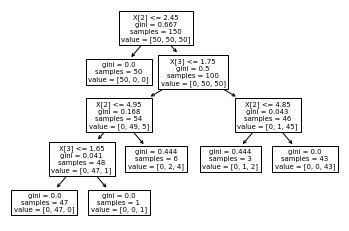

In [19]:
from sklearn import tree
tree.plot_tree(dt)

También podemos exportar el árbol en formato Graphviz utilizando  export_graphviz. Si se utiliza el gestor de paquetes conda, los binarios de graphviz


In [20]:
import graphviz 

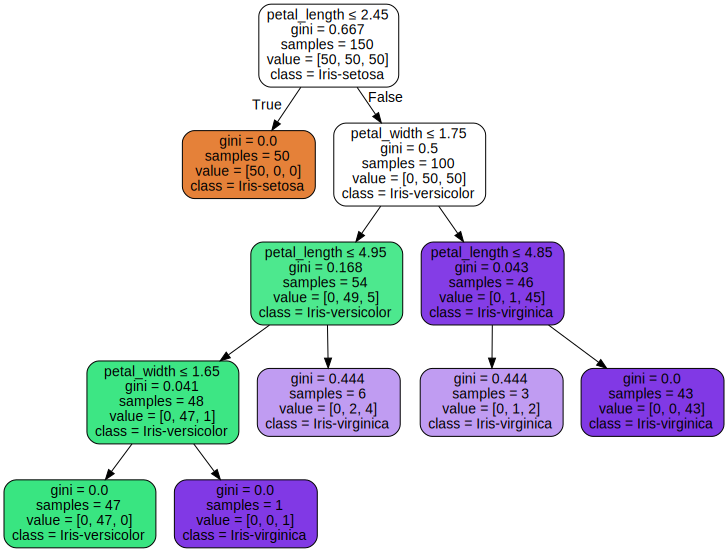

In [21]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=features,  class_names=targets, filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Construir un informe de texto que muestre las reglas de un árbol de decisión.

In [22]:
from sklearn.tree.export import export_text


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
r = export_text(dt, feature_names=features)

In [24]:
print(r)

|--- petal_length <= 2.45
|   |--- class: 0
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal_length >  4.95
|   |   |   |--- class: 2
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal_length >  4.85
|   |   |   |--- class: 2



#Validación split

Importar la libreria para dividir el conjunto de entrenamiento  y de test

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=0)

Vamos a monstar los ejemplos de entrenamiento

In [28]:
 X_train.shape, y_train.shape

((90, 4), (90,))

Vamos a mostrar los ejemplos de test

In [29]:
X_test.shape, y_test.shape

((60, 4), (60,))


Creamos el modelo con el conjunto de test


In [30]:
clf = DecisionTreeClassifier(min_samples_split=20, random_state=99).fit(X_train, y_train)

Evaluamos el modelo con los datos de test

In [31]:
clf.score(X_test, y_test)

0.95

#Validación cruzada

In [32]:
from sklearn.model_selection import cross_val_score


Hacemos la evaluación con folds=10



In [33]:
scores = cross_val_score(clf, X, y, cv=10)

Imprimimos la precisión

In [34]:
print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precisión: 0.96 (+/- 0.07)


También es posible utilizar otras estrategias de validación cruzada.

In [35]:
from sklearn.model_selection import ShuffleSplit

In [36]:
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.93333333, 0.95555556, 0.88888889, 0.97777778])

# Balanceo de clases

In [37]:
df_mod['class'].value_counts()['Iris-setosa']


50

In [38]:
df_mod['class'].value_counts()['Iris-versicolor']

50

In [39]:
df_mod['class'].value_counts()['Iris-virginica']

50

##Cambiamos de dataset

Clase 0: 144
Clase 1: 60
Proportion: 2.4 : 1


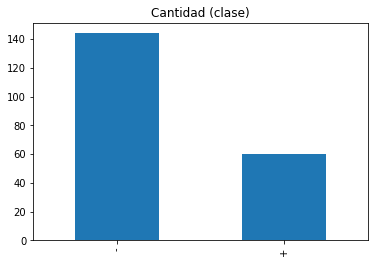

In [ ]:
df_train = pd.read_csv('badges.csv')
target_count = df_train.clase.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Cantidad (clase)');

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = df_train.columns[1:-1]

X = df_train[labels]
y = df_train['clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

model = DecisionTreeClassifier(min_samples_split=20, random_state=99)
##model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión: %.2f%%" % (accuracy * 100.0))

Precisión: 79.27%


In [ ]:
df_train.head()

,nombre,longitud,par,vocal,consonantes,espacios,puntos,palabras,clase
0,'Aaron Feigelson',15,0,1,7,1,0,2,-
1,'Alexander M. Meystel',20,1,1,11,2,1,3,-
2,'Ameur Foued',11,0,1,4,1,0,2,-
3,'Andrew W. Moore',15,0,1,7,2,1,3,-
4,'Andrey Burago',13,0,1,7,1,0,2,-


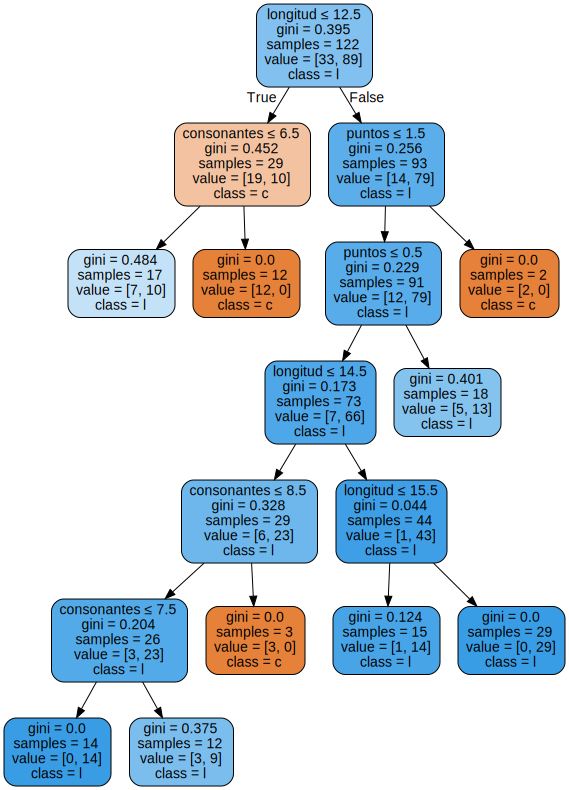

In [ ]:
balanced = tree.export_graphviz(model, out_file=None, feature_names=labels,  class_names='clase', filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(balanced)  
graph

## Matriz de confusion
Una forma interesante de evaluar los resultados es mediante una matriz de confusión, que muestra las predicciones correctas e incorrectas para cada clase. En la primera fila, la primera columna indica cuántas clases 0 se predijeron correctamente, y la segunda columna, cuántas clases 0 se predijeron como 1. En la segunda fila, observamos que todas las entradas de la clase 1 se predijeron erróneamente como clase 0.

Por lo tanto, cuanto más altos sean los valores diagonales de la matriz de confusión, mejor, indicando muchas predicciones correctas.

Confusion matrix:
 [[10 17]
 [ 0 55]]


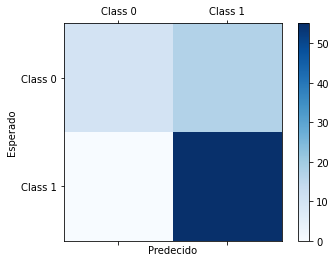

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predecido')
plt.ylabel('Esperado')
plt.show()

##Resampling
Una técnica ampliamente adoptada para tratar conjuntos de datos muy desequilibrados se denomina remuestreo. Consiste en retirar muestras de la clase mayoritaria (submuestreo) y/o añadir más ejemplos de la clase minoritaria (sobremuestreo).

A pesar de la ventaja de equilibrar las clases, estas técnicas también tienen sus puntos débiles (no hay almuerzo gratis). La implementación más simple del sobre-muestreo es duplicar los registros aleatorios de la clase minoritaria, lo que puede causar un sobreajuste. En el submuestreo, la técnica más simple consiste en eliminar los registros aleatorios de la clase mayoritaria, lo que puede causar la pérdida de información.

In [ ]:
# Class count
count_class_0, count_class_1 = df_train.clase.value_counts()

# Divide by class
df_class_0 = df_train[df_train['clase'] == '-']
df_class_1 = df_train[df_train['clase'] == '+']


Resampling:
+    60
-    60
Name: clase, dtype: int64


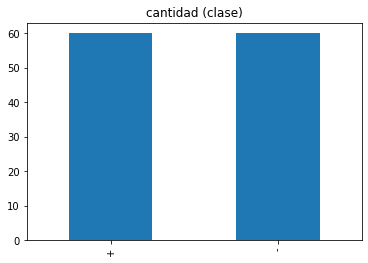

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Resampling:')
print(df_test_under.clase.value_counts())

df_test_under.clase.value_counts().plot(kind='bar', title='cantidad (clase)');

In [ ]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 78 to 203
Data columns (total 9 columns):
nombre         120 non-null object
longitud       120 non-null int64
par            120 non-null int64
vocal          120 non-null int64
consonantes    120 non-null int64
espacios       120 non-null int64
puntos         120 non-null int64
palabras       120 non-null int64
clase          120 non-null object
dtypes: int64(7), object(2)
memory usage: 9.4+ KB


In [ ]:
# Remove 'id' and 'target' columns
labels = df_test_under.columns[1:-1]

X = df_test_under[labels]
y = df_test_under['clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

model = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.42%


Confusion matrix:
 [[25  2]
 [ 5 16]]


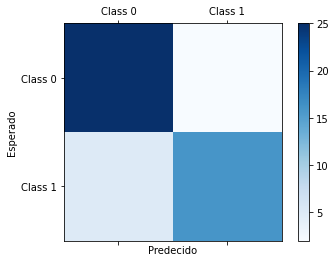

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predecido')
plt.ylabel('Esperado')
plt.show()

#Preguntas


1.   ¿Cómo cambias el citerio del árbol a entropia? ¿El resultado es distinto?
2.   ¿Cómo cambias el experimento para ejecutar el algoritmo de clasificación?



# Páginas webs
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* http://www.graphviz.org/
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score


